# Necessary Libraries

In [2]:
import keras
from keras import losses
from keras import optimizers
from keras.layers import Dropout,MaxPooling2D
from keras.layers import BatchNormalization
import numpy as np
from keras.utils import np_utils
import h5py
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

Using TensorFlow backend.
C:\Users\Jean.DESKTOP-0D64KCL.000\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Jean.DESKTOP-0D64KCL.000\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Jean.DESKTOP-0D64KCL.000\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Jean.DESKTOP-0

# Loading and Splitting the Dataset

In [3]:
h5f=h5py.File('SVHN_single_grey1.h5','r')

X_train=h5f['X_train'][:]
y_train=h5f['y_train'][:]
X_test=h5f['X_test'][:]
y_test=h5f['y_test'][:]

h5f.close()


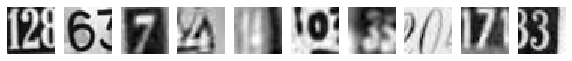

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [5]:
X_train= X_train.reshape(X_train.shape[0],1024)
X_test = X_test.reshape(X_test.shape[0],1024)

In [6]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

#no of classes
num_classes= y_test.shape[1]
num_hidden=32
num_classes

10

In [7]:
X_train=X_train/255.0
X_test=X_test/255.0

To normalize the data

# Neural Network

The nn model with batch normalization and Relu functions are all called using predefined functions

In [8]:
def nn_model():
  model= Sequential()
  model.add(BatchNormalization(input_shape=((1024,)))) 
  model.add(Dense(256,activation='relu'))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(32,activation='relu'))
  model.add(Dense(num_classes,activation='softmax'))
  # compile the model
  sgd= optimizers.Adam(lr =1e-3)
  model.compile(loss=losses.categorical_crossentropy,optimizer=sgd,metrics=['accuracy'])
  return model
# Build the model
model = nn_model()
# Fit the model
history = model.fit(X_test,y_test, validation_data=(X_test,y_test),epochs=30,batch_size=200,verbose=2)
scores= model.evaluate(X_test,y_test,verbose=0)
print("Error:%.2f%%" %(100-scores[1]*100))
model.summary()


Train on 18000 samples, validate on 18000 samples
Epoch 1/30
 - 3s - loss: 1.9489 - accuracy: 0.3231 - val_loss: 1.8936 - val_accuracy: 0.4607
Epoch 2/30
 - 2s - loss: 1.2470 - accuracy: 0.6013 - val_loss: 1.3252 - val_accuracy: 0.6714
Epoch 3/30
 - 2s - loss: 1.0166 - accuracy: 0.6814 - val_loss: 1.0060 - val_accuracy: 0.7305
Epoch 4/30
 - 2s - loss: 0.9014 - accuracy: 0.7161 - val_loss: 0.8339 - val_accuracy: 0.7487
Epoch 5/30
 - 2s - loss: 0.8037 - accuracy: 0.7448 - val_loss: 0.7394 - val_accuracy: 0.7679
Epoch 6/30
 - 2s - loss: 0.7552 - accuracy: 0.7591 - val_loss: 0.6791 - val_accuracy: 0.7879
Epoch 7/30
 - 2s - loss: 0.6787 - accuracy: 0.7858 - val_loss: 0.6113 - val_accuracy: 0.8097
Epoch 8/30
 - 2s - loss: 0.6404 - accuracy: 0.7979 - val_loss: 0.5575 - val_accuracy: 0.8291
Epoch 9/30
 - 2s - loss: 0.6046 - accuracy: 0.8050 - val_loss: 0.5329 - val_accuracy: 0.8340
Epoch 10/30
 - 2s - loss: 0.5622 - accuracy: 0.8226 - val_loss: 0.5012 - val_accuracy: 0.8421
Epoch 11/30
 - 2s 

Accuracy of 93% is obtained is the nn model. Error is only 6. %.

In [9]:
y_pred=model.predict(X_test)

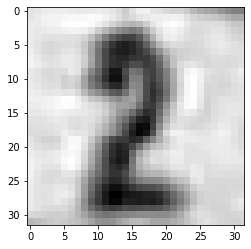

2
2


In [10]:
plt.imshow(X_test[2].reshape(32, 32), cmap="gray")
plt.show()
print(np.argmax(y_pred[2]))
print(np.argmax(y_test[2]))

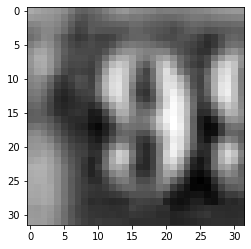

9
9
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [11]:
plt.imshow(X_test[5].reshape(32, 32), cmap="gray")
plt.show()
print(np.argmax(y_pred[5]))
print(np.argmax(y_test[5]))
print(history.history.keys())

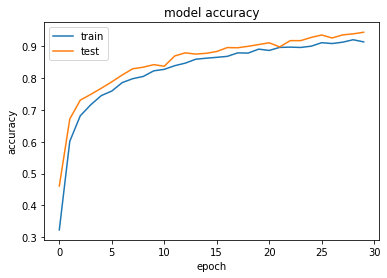

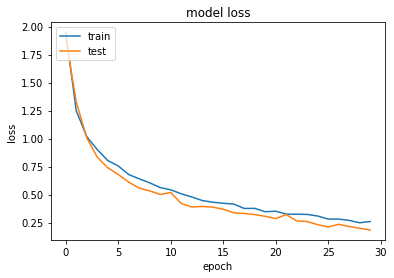

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

The neural network was build and performed good on the given dataset with a accuracy of 93%. I mostly used predefined functions
to build the nn. 2 images were tested and were predicted correctly.